## Observations and Insights 

In [246]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_mousedata = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how = "outer")
# Display the data table for preview

combined_mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [247]:
# Verify the total number of mice.

n = combined_mousedata.nunique(axis=0)
n



Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [248]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_mousedata.loc[combined_mousedata.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice



array(['g989'], dtype=object)

In [249]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_mousedata[combined_mousedata['Mouse ID'].isin(duplicate_mice)==False]

clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [250]:
# Checking the number of mice in the clean DataFrame.

n = clean_df.nunique(axis=0)
n


Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [251]:
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [252]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [253]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


means = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

In [254]:
std_mouse= clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

In [255]:
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": means, "Median":medians, "Variance":variances, "SD":std_mouse, "SEM": sem})

summary_df

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [256]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#clean_df.groupby().agg(["Mean","Median","Variance","SD","SEM",])

## Bar and Pie Charts

In [257]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas. 
# To verify total count, first show the numeric breakdown of mice per drug. 


#Filter data to two columns of clean data
mousegroup_df = clean_df.groupby("Drug Regimen").count()["Mouse ID"]

mousegroup_df.head()


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

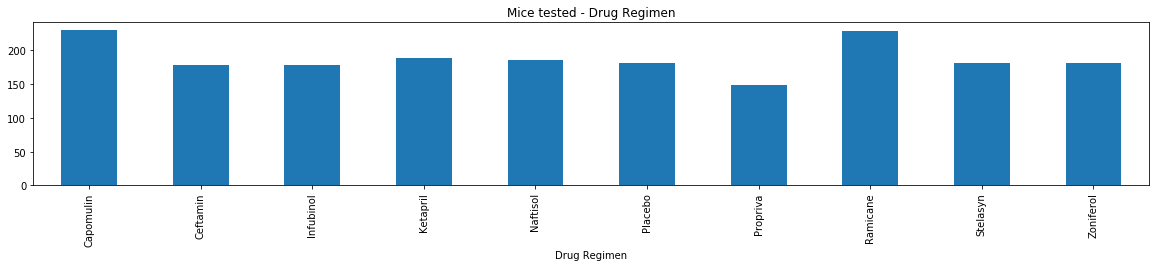

<Figure size 432x288 with 0 Axes>

In [258]:
mousegroup_df.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Mice tested - Drug Regimen")

plt.show()
plt.tight_layout()

In [259]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


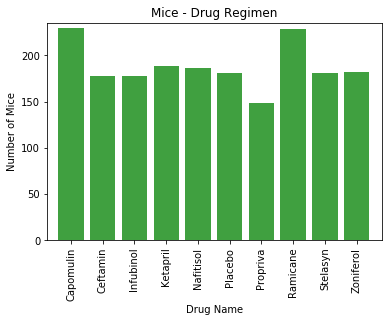

<Figure size 432x288 with 0 Axes>

In [260]:
#Set x axis and tick location
   

drugs = ["Capomulin","Ceftamin","Infubinol","Ketapril","Nafitisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
mice = [230,178,178,188,186,181,148,228,181,182]


x_axis = np.arange(0,len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Mice - Drug Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drugs)-.2)
plt.ylim(0, max(mice) + 5)

plt.bar(x_axis, mice, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation ="vertical")
plt.show()
plt.tight_layout()


In [261]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df.groupby("Sex").nunique()["Mouse ID"]
gender_count

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3bb43fac8>],
      dtype=object)

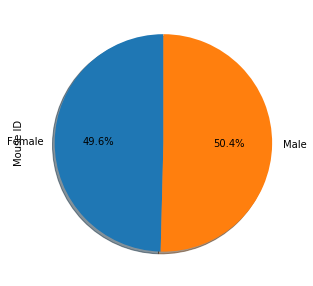

In [262]:
#Show percentages of each gender in pie chart.
gender_count.groupby(['Sex']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(10,5), autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc3bb7ee5f8>,
 [Text(-0.7176837777416649, -0.8336246128602807, 'Female'),
  Text(1.043903676715149, 1.2125448914331354, 'Male')],
 [Text(-0.39146387876818084, -0.45470433428742574, '49.6%'),
  Text(0.7176837777416649, 0.8336246128602804, '50.4%')])

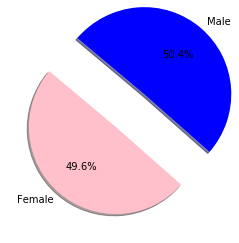

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Labels for the sections of our pie chart
labels = ["Female","Male"]

# The values of each section of the pie chart
sizes = [123, 125]

# The colors of each section of the pie chart
colors = ["pink","blue"]

# Tells matplotlib to seperate the "Sex" section from the others
explode = (0, 0.5)

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)




## Quartiles, Outliers and Boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

In [265]:
# Merge this group df with the original dataframe to get the tumor volume at the last(greatest) timepoint

combined_mousetumor = pd.merge(clean_df, summary_df, on= "Drug Regimen", how = "outer")

updated_combodata_df = combined_mousetumor.sort_values(by=['Tumor Volume (mm3)'], ascending=False)

updated_combodata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean,Median,Variance,SD,SEM
1479,o331,Ketapril,Male,24,30,45,78.567014,4,55.235638,53.698743,68.553577,8.279709,0.603860
1774,l725,Naftisol,Female,8,26,45,76.668817,3,54.331565,52.509285,66.173479,8.134708,0.596466
1498,p189,Ketapril,Male,8,28,45,75.294936,4,55.235638,53.698743,68.553577,8.279709,0.603860
1105,m269,Stelasyn,Female,22,28,45,75.123690,1,54.233149,52.431737,59.450562,7.710419,0.573111
1824,t724,Naftisol,Female,2,25,45,75.113288,2,54.331565,52.509285,66.173479,8.134708,0.596466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,k403,Ramicane,Male,21,16,35,26.546993,1,40.216745,40.673236,23.486704,4.846308,0.320955
236,s185,Capomulin,Female,3,17,40,25.472143,1,40.675741,41.557809,24.947764,4.994774,0.329346
8,k403,Ramicane,Male,21,16,40,24.365505,1,40.216745,40.673236,23.486704,4.846308,0.320955
237,s185,Capomulin,Female,3,17,45,23.343598,1,40.675741,41.557809,24.947764,4.994774,0.329346


In [266]:
# Generate a subset of data : Drug Regimen, Timepoint and Tumor Volume
newsum_df = updated_combodata_df.loc[:, ['Drug Regimen','Timepoint','Tumor Volume (mm3)']]

newsum_df.head()



,Drug Regimen,Timepoint,Tumor Volume (mm3)
1479,Ketapril,45,78.567014
1774,Naftisol,45,76.668817
1498,Ketapril,45,75.294936
1105,Stelasyn,45,75.123690
1824,Naftisol,45,75.113288


In [267]:
#Summary of Total Volume by Individual Drugs
data_meds = newsum_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
sum_table_df = pd.DataFrame(data_meds)

sum_table_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [268]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 
 # Determine outliers using upper and lower bounds
 # Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds

quartiles = sum_table_df.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles([.75]
iqr = upperq - lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of  Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of  tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


SyntaxError: invalid syntax (<ipython-input-268-4eb868b27218>, line 11)

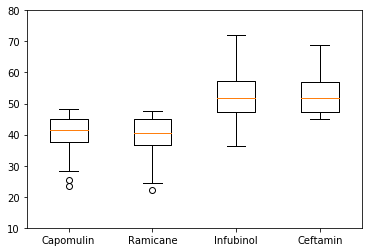

In [269]:
#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = updated_combodata_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

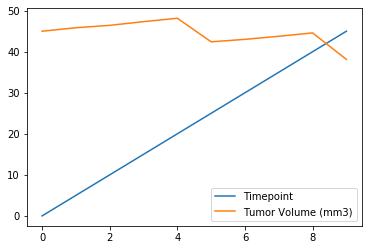

In [270]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tp_tumor = clean_df[clean_df["Mouse ID"].isin(["j119"])]
tp_tumor

tp_tumor_data= tp_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tp_tumor_data

line_plot_df = tp_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


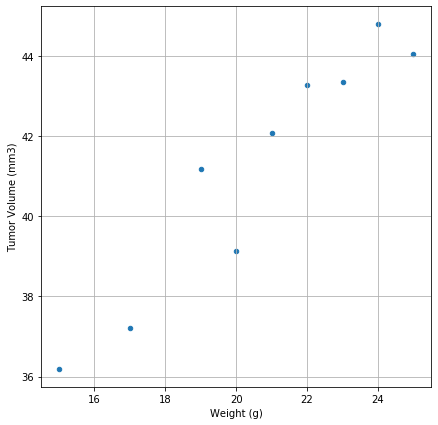

In [271]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
 # Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = clean_df.groupby(['Mouse ID']).mean()
    
capomulin_scatter = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_plot = clean_df[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (7,7))
capomulin_scatter

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.66


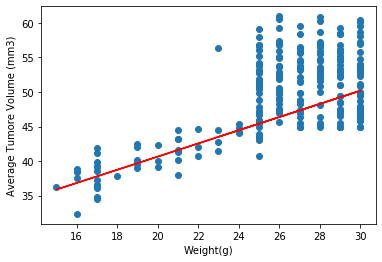

In [272]:
#Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

#capavg['Weight (g)']
mslope = 0.9544396890241045
bintercept = 21.552160532685015

y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()